# Machine Learning
### - Supervised Machine Learning  ( data + labels)
         - Regression    ( Regression, Lasso, Ridge)
                - Simple Linear Regression
                - Multiple Linear Regression
                - Polynomial Regression

# Regression
    - Finding dependent variable values using independent variable/es

---**Hello everyone!**---

Today I am going to build my first machine learning alogrithm which a simple linear regression model.....

---**So what is linear regression?**---


--Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. 


--It is the easiest alogrithm among all machine learning agorithm.


--Its quite simple to implement.


----**About Dataset**----

Here I am using a simple dataset from kaggle which is Weights and Heights dataset tried to apply linear regression algorithm.

The data contains the variables

**---Gender**

**---Height (m) **

**---Weight (kg)**

---**Goal**---

- Predict the height or weight of a person.


**Step 1--Data Preprocessing**

# Simple Linear Regression  ( Involves Only 1 input variable)

In [2]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
#Read the datasets
dataset=pd.read_csv("weight-height.csv")


In [20]:
#Check the dataset
dataset.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [21]:
dataset.shape

(10000, 3)

In [22]:
dataset.drop('Gender', axis=1,inplace=True)

In [23]:
#check if null values is present in dataset or not.....
dataset.isnull().sum()

Height    0
Weight    0
dtype: int64

In [24]:
#Checking the dimensions of the dataset
dataset.shape

(10000, 2)

**Lets check the correlation between each variables**

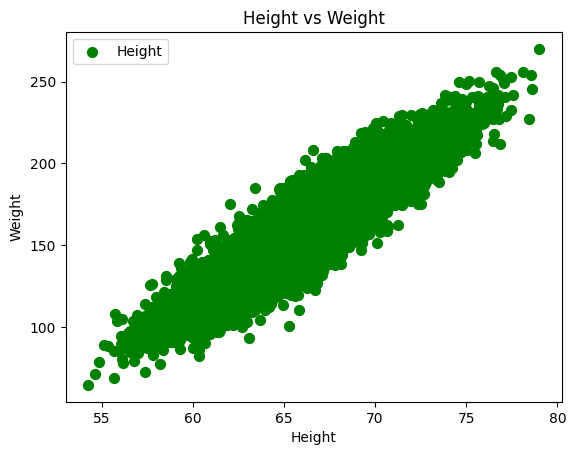

In [25]:
#Plot Gender vs Weight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 1].values
plt.scatter(x1,y1,label='Height',color='Green',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()

 ### From the above plot can have idea that **weight and height are highly dependent** on each other.In other words,we can say that as **height increases ,weight also increases**.

In [26]:
X = dataset.drop('Weight', axis=1)
y = dataset['Weight']

**Step 2-Splitting the dataset into training and testing set**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [29]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [30]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# cheak Coefficients and Intercept
print('Coefficients: ', regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients:  [7.70228296]
Intercept -349.8029880951042


# Prediction on Training Data : Training Accuracy 

In [35]:
y_train_pred = regressor.predict(X_train)
pd.DataFrame({'Original Weight':y_train, 'Predicted_Weight': y_train_pred})

,Original Weight,Predicted_Weight
4901,159.738668,145.272749
4375,204.220209,211.878064
6698,150.142299,161.496660
9805,135.131331,144.485468
1101,196.351300,203.681901
...,...,...
5734,139.223151,138.136544
5191,90.728561,103.565904
5390,156.800504,145.649489
860,179.386817,182.228295


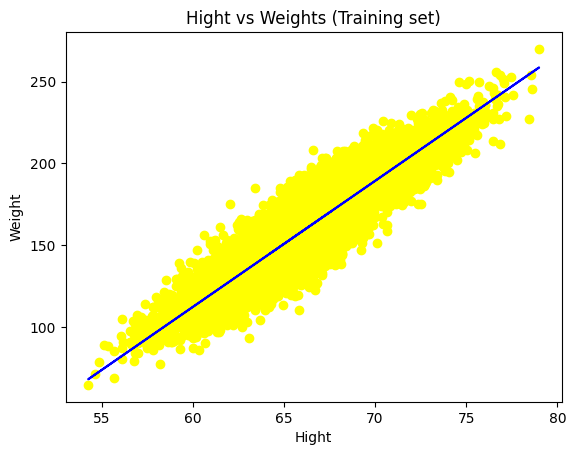

In [36]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

**Checking the accuracy**


In [43]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print("mean_absolute_error", mean_absolute_error(y_train, y_train_pred))
print("mean_squared_error", mean_squared_error(y_train, y_train_pred))
print("r2_score", r2_score(y_train, y_train_pred)*100)



mean_absolute_error 9.755565351821717
mean_squared_error 149.29588707355975
r2_score 85.43986528206867


# Prediction on Testing Data : Testing Accuracy 

In [44]:
y_test_pred = regressor.predict(X_test)

In [45]:
pd.DataFrame({"Original Weight":y_test, "Predicted Weight":y_test_pred })

,Original Weight,Predicted Weight
6252,173.115813,179.245510
4684,195.162042,180.340016
1731,170.217451,161.614184
4742,215.049660,204.217142
4521,182.721452,166.580421
...,...,...
4862,203.763292,193.474977
7025,155.915544,157.570316
7647,123.862430,117.317271
7161,165.324899,167.192900


**Checking the accuracy**

In [47]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean(y_test_pred - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))


Mean squared error: 0.06
Variance score: 0.86


In [50]:
def predictedWeight(height):
    return regressor.predict([[height]])

In [51]:
height = float(input("if you wana guess youe wait please provide me your height in feet"))*12
print(f"Our model says your weight is about {(predictedWeight(height)*0.453592)} Kgs")

if you wana guess youe wait please provide me your height in feet 5


Our model says your weight is about [50.95379886] Kgs


C:\Users\Shoukat\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
